In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("Datasets\monthly-milk-production-pounds-p.csv")

In [4]:
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


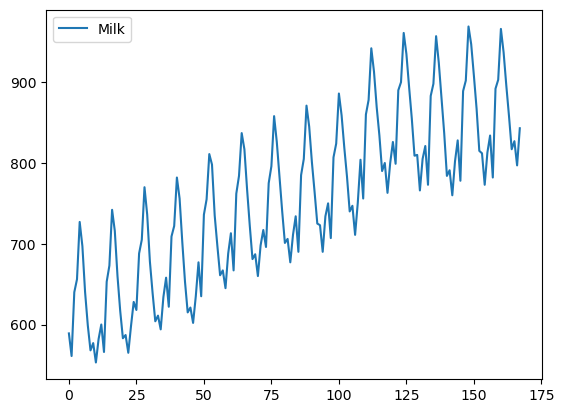

In [6]:
df.plot()
plt.show()

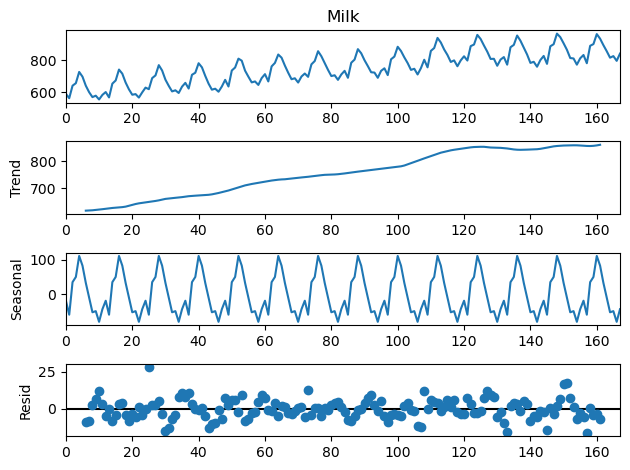

In [7]:
result = seasonal_decompose(df["Milk"],
                           model = "additive",
                           period = 12)
result.plot()

# Multipicative df

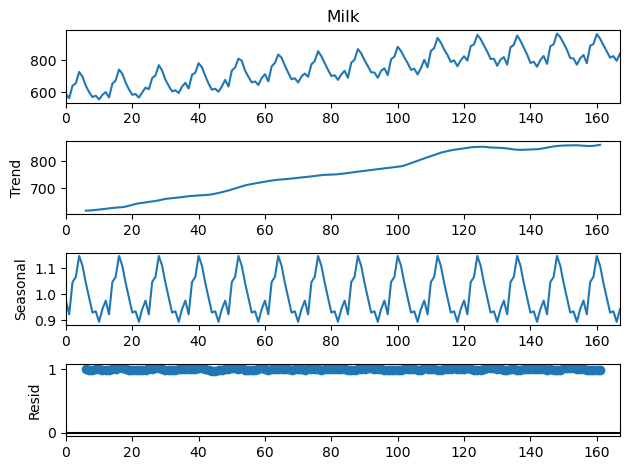

In [10]:
result2 = seasonal_decompose(df["Milk"],
                           model = "multiplicative",
                           period = 12)
result2.plot()
plt.show()

# Overlayed


plt.subplot(2, 2, 1)
result = seasonal_decompose(df["Milk"],
                           model = "additive",
                           period = 12)
result.plot()

plt.subplot(2, 2, 2)
result2 = seasonal_decompose(df["Milk"],
                           model = "multiplicative",
                             period = 12)
result2.plot()
plt.tight_layout()
plt.show()

%matplotlib inline

# Partitioning the data

In [30]:
y = df["Milk"]

y_train = df["Milk"][:-12]
y_test = df["Milk"][-12:]



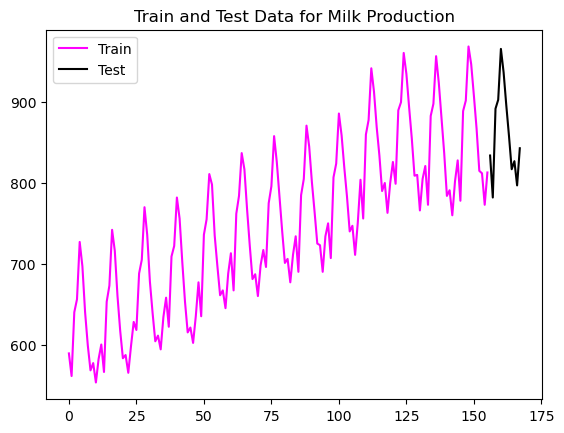

In [41]:
plt.plot(y_train,
         color = "magenta",
         label = "Train")

plt.plot(y_test,
         color = "black",
         label = "Test")

plt.legend(loc = "best")
plt.title("Train and Test Data for Milk Production")
plt.show()

# Centered Moving Average

In [50]:
fcast = y.rolling(3, center = True).mean()
#fcast = y.rolling(window = 3, center = True).mean()

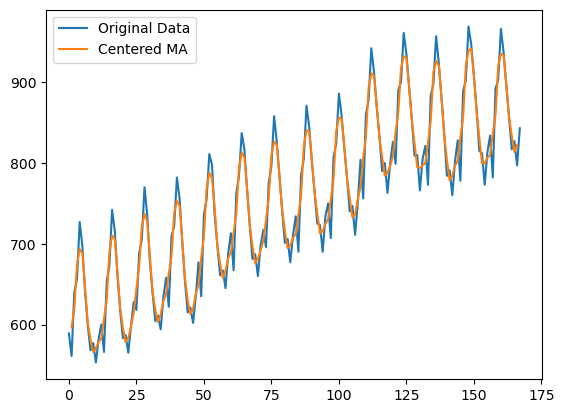

In [51]:
plt.plot(y, label = "Original Data")
plt.plot(fcast, label = "Centered MA")
plt.legend(loc = "best")

plt.show()

# Trailing moving average

## For span 3

In [144]:
span = 3

In [63]:
fcast = y_train.rolling(span).mean()

In [64]:
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)

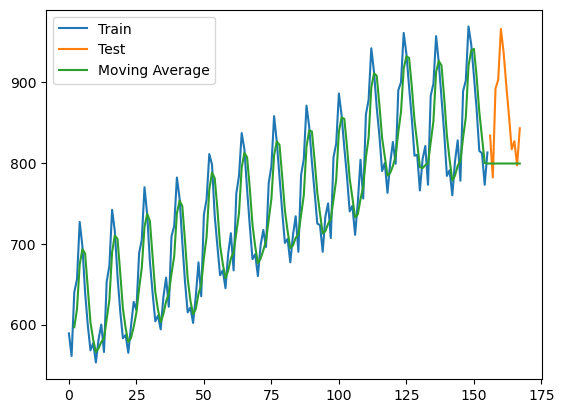

In [55]:
plt.plot(y_train, label = "Train")
plt.plot(y_test, label = "Test")
plt.plot(MA_fcast, label = "Moving Average")
plt.legend(loc = "best")
plt.show()

### Evaluating

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE =",rmse)

RMSE = 83.33766655400582


## For span 6

In [84]:
span2 = 6

In [85]:
fcast = y_train.rolling(span2).mean()

In [86]:
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)

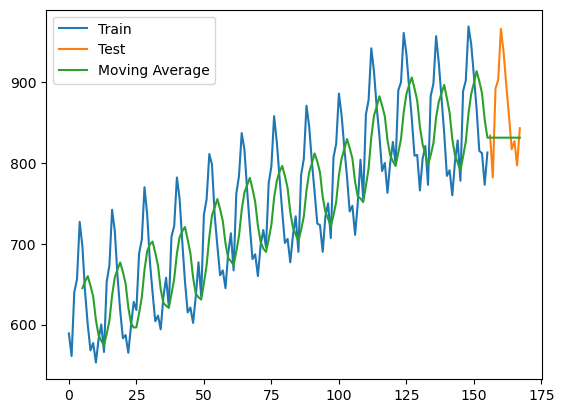

In [87]:
plt.plot(y_train, label = "Train")
plt.plot(y_test, label = "Test")
plt.plot(MA_fcast, label = "Moving Average")
plt.legend(loc = "best")
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE =",rmse)

RMSE = 62.57661970203673


# Simple Exponential Smoothing

In [89]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [101]:
alpha = 0.1

In [102]:
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)

In [103]:
fcast1 = fit1.forecast(len(y_test))

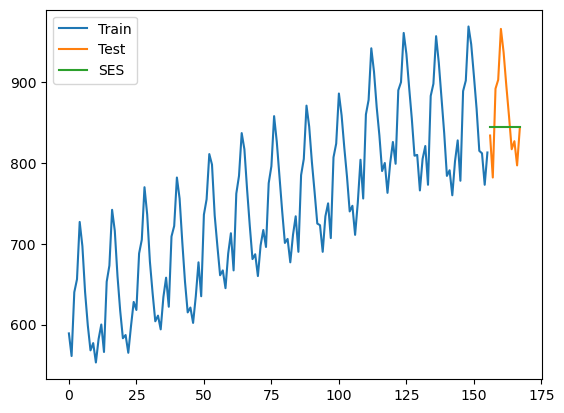

In [104]:
plt.plot(y_train, label ="Train")
plt.plot(y_test, label ="Test")
plt.plot(fcast1, label ="SES")

plt.legend(loc = "best")
plt.show()

### Evaluating

In [106]:
# Lower RMSE is Preferred, as it signifies error

rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE =",rmse)

RMSE = 57.02407689025325


### Checking for various smoothening co.eff (alpha)

In [122]:
rmse_alpha = {}
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5]

for alpha in alpha_list:
    
    fit = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
    fcast = fit.forecast(len(y_test))
    
    rmse = np.sqrt(mean_squared_error(y_test, fcast))
    rmse_alpha[alpha] = rmse
    
print(rmse_alpha)
    

{0.1: 57.02407689025325, 0.2: 60.41719003278307, 0.3: 66.49878205261881, 0.4: 72.658498800867, 0.5: 76.91666495915985}


# Holt's Model

In [135]:
from statsmodels.tsa.api import Holt

In [136]:
alpha = 0.1
beata = 0.9

In [137]:
fit_hm = 

SyntaxError: invalid syntax (1156960081.py, line 1)

# Holt's Linear Model

# Holt-Winters Aditive

In [138]:
from statsmodels.tsa.api import ExponentialSmoothing

In [139]:
alpha = 0.1
beta = 0.8
gamma = 0.3 

In [140]:
fit_hwa = ExponentialSmoothing(y_train,
                              seasonal_periods = 12,
                              trend = "add",
                              seasonal = "add").fit()

fcast_hwa = fit_hwa.forecast(len(y_test))

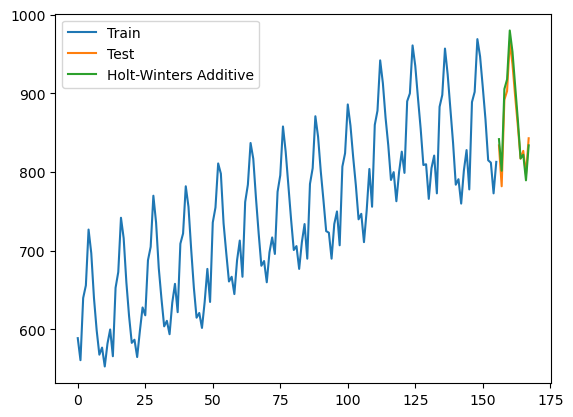

In [141]:
plt.plot(y_train, label ="Train")
plt.plot(y_test, label ="Test")
plt.plot(fcast_hwa, label ="Holt-Winters Additive")

plt.legend(loc = "best")

plt.show()

### Evaluating

In [143]:
rmse = np.sqrt(mean_squared_error(y_test, fcast_hwa))
print("RMSE =", rmse)

RMSE = 11.932665837714705


# Holt-Winters Damped Additive